# My 1st Linear Regression Model

In [341]:
import statistics as stats
import numpy as np

class LinearModel:
    
    def find_coef(self, x, y):

       # Calculates the slope of the curve
        
        self.x = x
        self.y = y
        
        if type(x) == 'pandas.core.frame.DataFrame':
            hh = np.array(x)
            t = np.ndarray.tolist(hh)
            
        if type(x) == 'numpy.ndarray':
            t = np.ndarray.tolist(x)
            
            
        np_x = np.array(x)
        np_y = np.array(y)
        cov = np.cov(np_x, np_y) [0][1]
        
        return cov/stats.variance(x)
    
    def intercept(self, x, y):
        
        # Calculates the intercept of the curve
        self.x = x
        self.y = y
        
        if type(x) == 'pandas.core.frame.DataFrame':
            hh = np.array(x)
            t = np.ndarray.tolist(hh)
            
        if type(x) == 'numpy.ndarray':
            t = np.ndarray.tolist(x)
            
        np_x = np.array(x)
        np_y = np.array(y)
        
        cov = np.cov(np_x, np_y) [0][1]
        coef = cov/stats.variance(x)
        
        mean_x = stats.mean(x)
        mean_y = stats.mean(y)
        take = mean_y - (coef * mean_x)
        
        return round(take, 3)
    
    def predict(self, x, y):
        
        # Based on the linear regression model, it predicts the dependent variable from given independent variable data 
        
        self.x = x
        self.y = y
        
        if type(x) == 'pandas.core.frame.DataFrame':
            hh = np.array(x)
            t = np.ndarray.tolist(hh)
            
        if type(x) == 'numpy.ndarray':
            t = np.ndarray.tolist(x)
            
        np_x = np.array(x)
        np_y = np.array(y)
        
        cov = np.cov(np_x, np_y) [0][1]
        coef = cov/stats.variance(x)
        
        mean_x = stats.mean(x)
        mean_y = stats.mean(y)
        
        intercept = mean_y - (coef * mean_x)
        
        result = []
        
        for i in x:
            result.append((coef * i) + intercept)
        
        if type(x) == 'pandas.core.frame.DataFrame' or 'numpy.ndarray':
            hh = np.array(result)
            
        return result
    

    def r_sq(self, x, y):
        
        # Calculates R^2 value for given data
        
        self.x = x
        self.y = y
        
        if type(x) == 'pandas.core.frame.DataFrame':
            hh = np.array(x)
            t = np.ndarray.tolist(hh)
            
        if type(x) == 'numpy.ndarray':
            t = np.ndarray.tolist(x)
            
        np_x = np.array(x)
        np_y = np.array(y)
        
        corr = np.corrcoef(np_x, np_y) [0] [1]
        
        return corr ** 2
        
    

In [342]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [343]:
df = pd.read_csv("dataset.csv")
del df["Data_Point"]

In [344]:
df

,Rat_Weight_(g),Rat_Height_(cm)
0,34.1,56.2
1,37.2,72.1
2,32.1,51.9
3,33.2,55.1
4,39.1,75.2
5,36.6,69.1
6,34.8,60.1
7,30.2,34.5
8,29.2,32.1


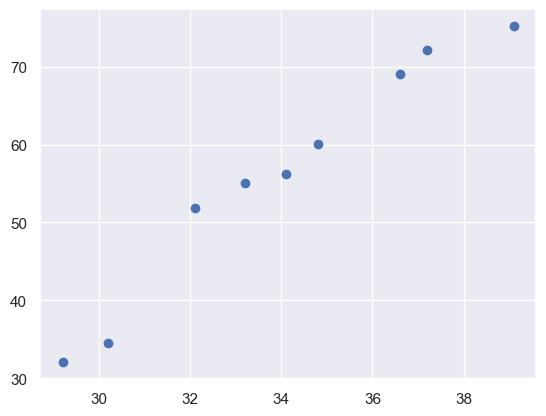

In [345]:
xs = df["Rat_Weight_(g)"]
ys = df["Rat_Height_(cm)"]

xs, ys = zip(*sorted(zip(xs, ys)))

plt.plot(xs, ys, 'o')
plt.show()

In [346]:
regr = LinearModel()

In [347]:
print("The slope is " + str(regr.find_coef(df["Rat_Weight_(g)"], df["Rat_Height_(cm)"])))
print("The intercept is " + str(regr.intercept(df["Rat_Weight_(g)"], df["Rat_Height_(cm)"])))  
print("The R^2 is " + str(regr.r_sq(df["Rat_Weight_(g)"], df["Rat_Height_(cm)"])))  

The slope is 4.58753546976284
The intercept is -99.976
The R^2 is 0.9623349828370533


In [348]:
Predicted_Data = regr.predict(df["Rat_Weight_(g)"], df["Rat_Height_(cm)"])
df["Predicted"] = Predicted_Data

In [349]:
df

,Rat_Weight_(g),Rat_Height_(cm),Predicted
0,34.1,56.2,56.459446
1,37.2,72.1,70.680806
2,32.1,51.9,47.284375
3,33.2,55.1,52.330664
4,39.1,75.2,79.397123
5,36.6,69.1,67.928285
6,34.8,60.1,59.670721
7,30.2,34.5,38.568058
8,29.2,32.1,33.980522


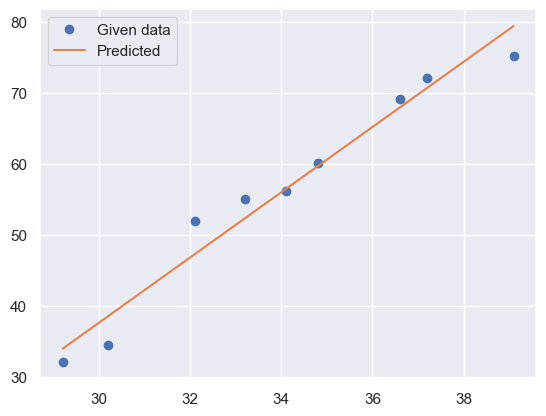

In [350]:
xs = df["Rat_Weight_(g)"]
ys = df["Rat_Height_(cm)"]
zs = df["Predicted"]

xs, ys, zs = zip(*sorted(zip(xs, ys, zs)))

plt.plot(xs, ys, 'o', label = "Given data")
plt.plot(xs, zs, label = "Predicted")
plt.legend()
plt.show()